In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import plot as plot
import json
from model import test
from pathlib import Path
from utils import create_directory

In [6]:
model_num = 1
phase = 0


model_name = "model{:02d}".format(model_num)
data_dir = create_directory(directory_name='try3')
log_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_log.json'))[0]
weight_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_weights'))[0]
cfg_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_cfg.json'))[0]

Directory '/Users/mahdiyarshahbazi/Documents/Data/MotorNet/try3' already exists.


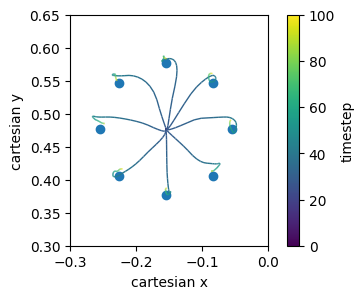

In [3]:
xy, tg, all_hidden, all_actions = test(cfg_file,weight_file,ff_coefficient=0)
fig, ax  = plot.plot_simulations(xy=xy,target_xy=tg)

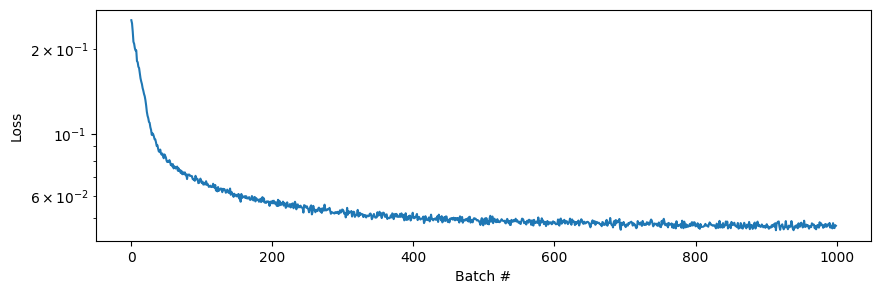

In [4]:
log = json.load(open(log_file,'r'))['position_loss']
fig,ax = plot.plot_training_log(log=log)

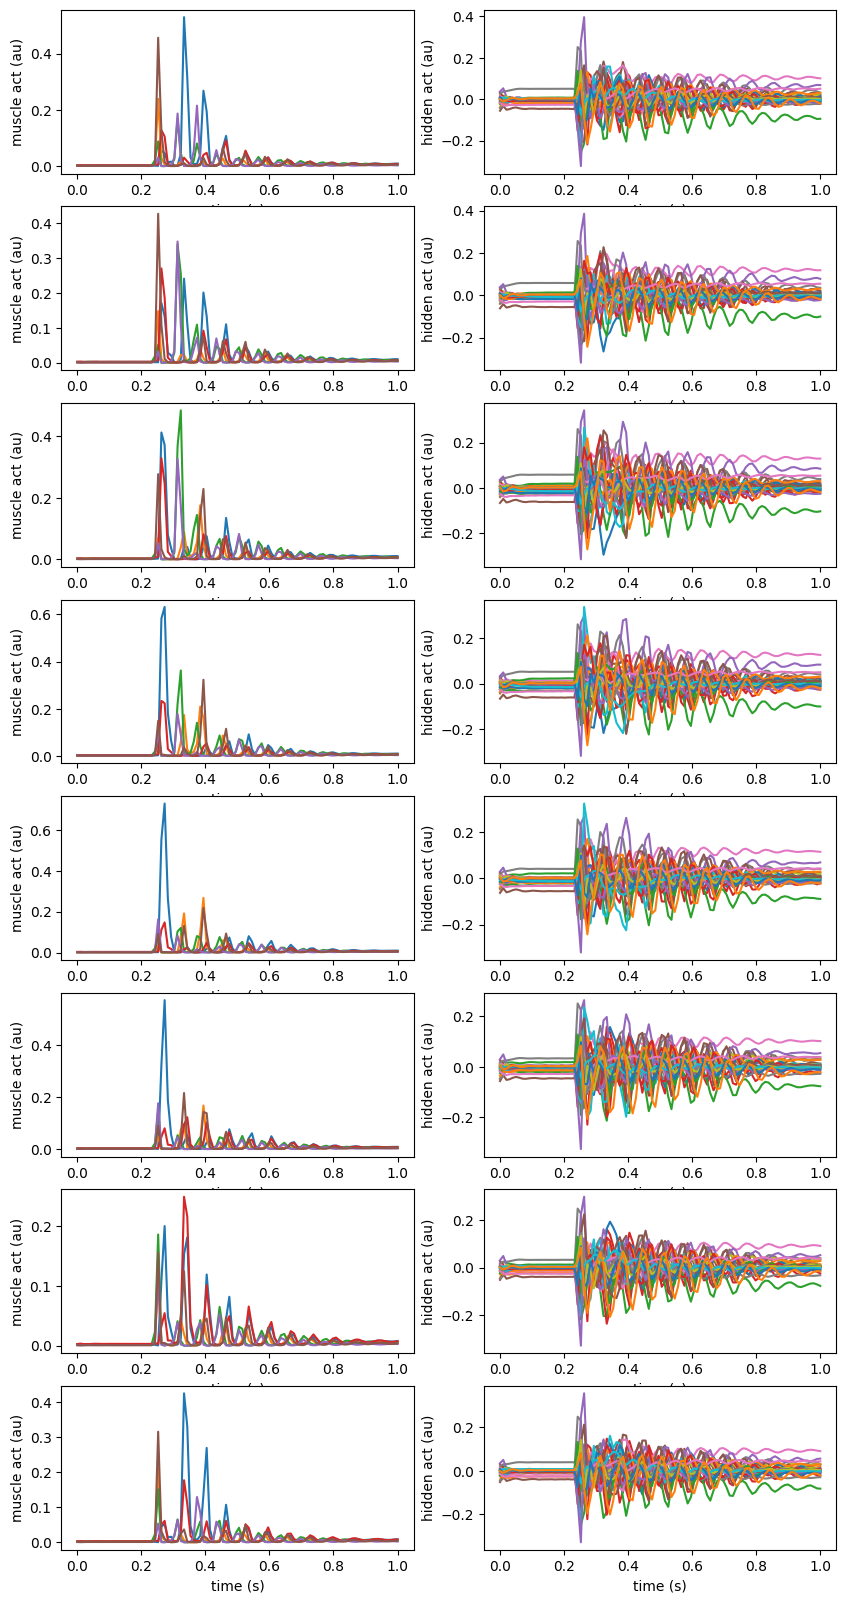

In [5]:
fig, ax = plot.plot_activation(all_hidden, all_actions)
#fig.savefig(os.path.join(data_dir,'activations.png'),dpi=300)